In [15]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
import os

In [17]:
import glob
import cPickle as pickle

In [18]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [99]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'
RESULTS_DIR2 = '/n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH//'

In [20]:
for i in range(1,6):
    for subdir, _, _ in os.walk(RESULTS_DIR+'/C.Figure4.data_to_type'+str(i)):
    #     print subdir
        if len(subdir.split('/')) == 9:
          if len(os.listdir(subdir)) != 24:
            print subdir, len(os.listdir(subdir))

    #         classifier = subdir.split('/')[-1]
    #         dataset = subdir.split('/')[-2]
    #         experiment = subdir.split('/')[-3]

    #         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [21]:

for subdir, _, _ in os.walk(RESULTS_DIR+'/C.Figure4.multi'):
#     print subdir
    if len(subdir.split('/')) == 9:
      if len(os.listdir(subdir)) != 24:
        print subdir, len(os.listdir(subdir))

    #         classifier = subdir.split('/')[-1]
    #         dataset = subdir.split('/')[-2]
    #         experiment = subdir.split('/')[-3]

    #         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [162]:
all_stats = [None]*6

for a in range(1,6):

    experiment = 'C.Figure4.data_to_type'+str(a)
    e_dir = os.path.join(RESULTS_DIR, experiment)
    e2_dir  = os.path.join(RESULTS_DIR2, experiment)

    stats = [None]*6

    classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
    for i,c in enumerate(classifiers):

        stats[i] = []
        c_dir = os.path.join(e_dir, c)

        stats_files = glob.glob(c_dir+'/*.p')
        stats_per_c = []
    #     print stats_files

        for s in stats_files:

            with open(s, 'r') as f:
                stats_from_file = pickle.load(f)
            stats_per_c.append(stats_from_file)
    #         print stats['time']

        stats[i].append(stats_per_c)
        
    classifiers = ['VGG19', 'XCEPTION']
    for i,c in enumerate(classifiers):

        stats[i+4] = []
        c_dir = os.path.join(e2_dir, c)

        stats_files = glob.glob(c_dir+'/*.p')
        stats_per_c = []
    #     print stats_files

        for s in stats_files:

            with open(s, 'r') as f:
                stats_from_file = pickle.load(f)
            stats_per_c.append(stats_from_file)
    #         print stats['time']

        stats[i+4].append(stats_per_c)
        
#     print stats
    all_stats[a-1] = stats
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])


experiment = 'C.Figure4.multi'
e_dir = os.path.join(RESULTS_DIR, experiment)
e2_dir = os.path.join(RESULTS_DIR2, experiment)

stats = [None]*6

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):

    stats[i] = []
    if i < 4:
        c_dir = os.path.join(e_dir, c)
    else:
        c_dir = os.path.join(e2_dir, c)

    stats_files = glob.glob(c_dir+'/*.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:

        with open(s, 'r') as f:
            stats_from_file = pickle.load(f)
        stats_per_c.append(stats_from_file)
#         print stats['time']

    stats[i].append(stats_per_c)
#     print stats
all_stats[5] = stats

In [110]:
len(all_stats[0])

6

In [112]:
print all_stats[0][4]

None


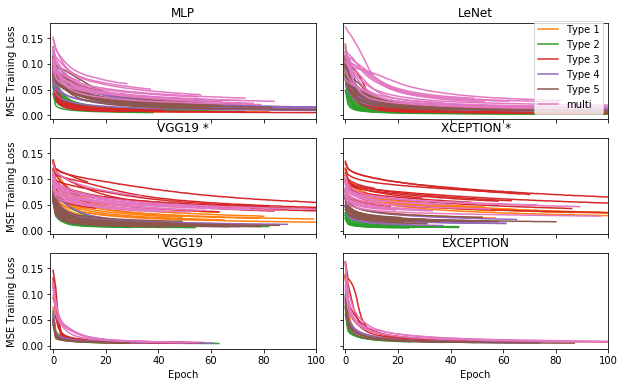

In [179]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19 *', 'XCEPTION *', 'VGG19', 'EXCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*6

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1 or i==3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[i].get_yticklabels(), visible=False)
        plt.setp(axes[i].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2 or i == 4:
        
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        

        if i == 2:
            plt.setp(axes[i].get_xticklabels(), visible=False)  
        
        
        plt.ylabel('MSE Training Loss')
        if i!=2:
            plt.xlabel('Epoch')                
    elif i == 5:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[5].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')         

    for type_ in range(1,7):
        for sample in range(len(all_stats[type_-1][i][0])):

            loss_for_type = all_stats[type_-1][i][0][sample]['loss']

            if sample == 0:
                # only label the first
                c_label = 'Type '+str(type_)
                if type_ == 6:
                    c_label='multi'
                plot(loss_for_type, label=c_label, color='C'+str(type_))
            else:
                # but use the same colors for all
                plot(loss_for_type, color='C'+str(type_))

            
    plt.xlim(-1,100)
    plt.title(c)


    if i == 1:
        plt.legend()
        
plt.savefig('../PAPER/gfx/figure4_val_loss_with_multi.pdf', bbox_inches='tight', pad_inches=0)

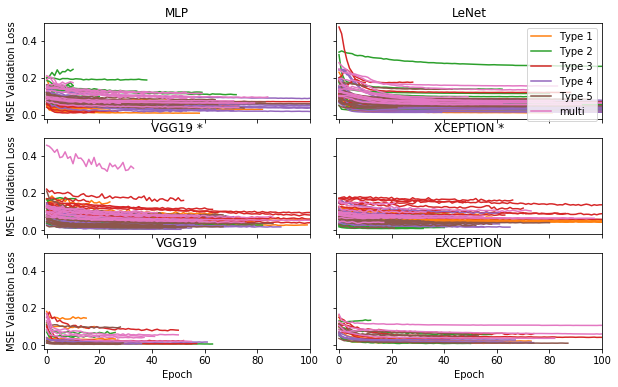

In [178]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19 *', 'XCEPTION *', 'VGG19', 'EXCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*6

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Validation Loss')        
    elif i == 1 or i==3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[i].get_yticklabels(), visible=False)
        plt.setp(axes[i].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2 or i == 4:
        
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        

        if i == 2:
            plt.setp(axes[i].get_xticklabels(), visible=False)  
        
        
        plt.ylabel('MSE Validation Loss')
        if i!=2:
            plt.xlabel('Epoch')                
    elif i == 5:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[5].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')         

    for type_ in range(1,7):
        for sample in range(len(all_stats[type_-1][i][0])):

            loss_for_type = all_stats[type_-1][i][0][sample]['val_loss']

            if sample == 0:
                # only label the first
                c_label = 'Type '+str(type_)
                if type_ == 6:
                    c_label='multi'
                plot(loss_for_type, label=c_label, color='C'+str(type_))
            else:
                # but use the same colors for all
                plot(loss_for_type, color='C'+str(type_))

            
    plt.xlim(-1,100)
    plt.title(c)


    if i == 1:
        plt.legend()
        
plt.savefig('../PAPER/gfx/figure4_val_loss_with_multi.pdf', bbox_inches='tight', pad_inches=0)

0 1 6 1
0 2 6 1
0 3 6 1
0 4 6 1
0 5 6 1
0 6 6 1
1 1 6 1
1 2 6 1
1 3 6 1
1 4 6 1
1 5 6 1
1 6 6 1
2 1 6 1
2 2 6 1
2 3 6 1
2 4 6 1
2 5 6 1
2 6 6 1
3 1 6 1
3 2 6 1
3 3 6 1
3 4 6 1
3 5 6 1
3 6 6 1
4 1 6 1
4 2 6 1
4 3 6 1
4 4 6 1
4 5 6 1
4 6 6 1
5 1 6 1
5 2 6 1
5 3 6 1
5 4 6 1
5 5 6 1
5 6 6 1
2 MLP
3 LeNet
4 VGG19
5 Xception
6 VGG19
7 Xception
2 MLP
3 LeNet
4 VGG19
5 Xception
6 VGG19
7 Xception
2 MLP
3 LeNet
4 VGG19
5 Xception
6 VGG19
7 Xception
2 MLP
3 LeNet
4 VGG19
5 Xception
6 VGG19
7 Xception
2 MLP
3 LeNet
4 VGG19
5 Xception
6 VGG19
7 Xception
2 MLP
3 LeNet
4 VGG19
5 Xception
6 VGG19
7 Xception


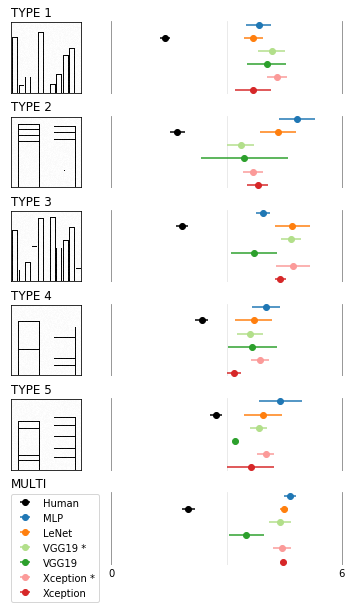

In [165]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

all_data = []
images = []

# titles = ['Framed Rectangles', 'Bars']

## data
no_samples = len(all_stats[0][0][0])

#
# human values
#
human_values = [(1.4, 0.14),\
                (1.72, 0.2),\
                (1.84, 0.16),\
                (2.35, 0.175),\
                (2.72, 0.155)]
human_values.append((np.mean([v[0] for v in human_values]), np.mean([v[1] for v in human_values])))


bar_data = [None]*6
all_data = [None]*6
classifiers = ['MLP', 'LeNet', 'VGG19', 'Xception', 'VGG19', 'Xception']
for i, c in enumerate(classifiers):

    mlae_for_c = []
    
    for type_ in range(1,7):
        
        mlae_for_type = []
        print i, type_, len(all_stats[type_-1]), len(all_stats[type_-1][i])
        for sample in range(len(all_stats[type_-1][i][0])):

            mlae_for_sample = all_stats[type_-1][i][0][sample]['MLAE']

            mlae_for_type.append(mlae_for_sample)
    
        mlae_for_c.append(mlae_for_type)
        
    all_data[i] = mlae_for_c
    

all_data[3], all_data[4] = all_data[4], all_data[3]
    
## images
images = []
for type_ in range(1,6):
    data, labels = C.Figure4.generate_datapoint()
    
    image = eval('C.Figure4.data_to_type'+str(type_))(data)
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))

    images.append(image)

# add multi image
images.append(np.ones((50,50)))

fig = plt.figure(figsize=(6,10), facecolor='white')
gs = gridspec.GridSpec(6, 2, width_ratios=[.3,1], hspace=.3)

j = 0 # grid index (running)

rows = 6
for row in range(rows):
    
    for i, c in enumerate(['Image', 'Human']+classifiers):
        

        
        if i==0:
            # this is the image

            fig = plt.subplot(gs[j])
            j += 1
            
            c_label = 'TYPE '+str(row+1)
            if row==5:
                c_label = 'MULTI'
                ax = plt.gca()
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['left'].set_visible(False)
                
            plt.title(c_label, loc='left')

            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()
            


            ax.set_xticklabels('')
            ax.set_yticklabels('')
            
            plt.imshow(images[row], cmap='Greys', interpolation='none')
            
            continue

        #
        
        if i==1:

            fig = plt.subplot(gs[j])
            j += 1
        
#             if row > 4:
#                 continue
        
            # this is human
            means = human_values[row][0]
            confidence = human_values[row][1]
            
            errorbars = plt.errorbar(means, 6-i, xerr=confidence, fmt='o',  color='black', label='Human')
            continue

#         if row == 0:
#             plt.title(c)

#         print row
        data = [all_data[i-2][row]]
#         print data
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
#         print sorted_data
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]
        
        means = [np.mean(r) for r in data]
        
        confidence = [1.96*np.std(r) for r in data]


#         y_pos = range(len(means))
        y_pos = 8-i

        plt.xlim(0,6.1)

        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
#         if row != 0:
        ax.get_yaxis().set_ticks([])
#         else:
#     #             print labels
#             ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
#             ax.get_yaxis().set_ticklabels(labels)

        ax.get_xaxis().set_ticks(np.arange(0,7,6)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)
        
      
        # remove tick marks
        if row != 5:
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')

        # grid lines for X
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)

        colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e'][::-1]
        

        c_color = 'C'+str(i-2)
        print i, c
        if i == 4:
            # vgg19 imagenet
            c = c+' *'
            c_color = '#b2df8a'
        elif i == 5:
            # vgg from scratch
#             c = c+'vg s'
            c = 'VGG19'
            c_color = 'C2'
        elif i == 6:
            # xcpetion imagenet
            c = 'Xception *'
            c_color = '#fb9a99'
        elif i == 7:
            # xception from scratch
#             c = c+'x sc'
#             c = 'Xception'
            c_color = 'C3'
        
        errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o',  label=c, color=c_color)
plt.legend(loc='upper left', bbox_to_anchor=(-.45, 1.05))
plt.savefig('../PAPER/gfx/figure4_mlae_with_multi_and_humans_all.pdf', bbox_inches='tight', pad_inches=0)

In [123]:
print [np.mean(all_data[v][0]) for v in range(6)]
print [np.mean(all_data[v][1]) for v in range(6)]
print [np.mean(all_data[v][2]) for v in range(6)]
print [np.mean(all_data[v][3]) for v in range(6)]
print [np.mean(all_data[v][4]) for v in range(6)]



[3.8474310514413737, 3.7873203554827768, 4.2004560739063184, 4.0371715536119694, 4.3447671236816801, 3.5185619057359609]
[4.8057572438473501, 4.2118772019546205, 3.5894967948539409, 3.5308949655073345, 3.7271344025115636, 3.8454056063047144]
[3.9508112608406076, 4.519078524092162, 4.6231843624142135, 3.7729470819678022, 4.8046866060735951, 4.4260823636183391]
[4.0075034464790056, 3.7337490047646162, 3.5737098523047908, 3.500218022552037, 3.932552690130672, 3.2599031478378704]
[4.3964907780910023, 3.8587358987547664, 3.7941353814342604, 3.6213019910142066, 4.02080823459415, 3.7188356132965743]


In [155]:
all_data_per_type = []
for type_ in range(5):
#     all_data_per_type += [all_data[v][type_] for v in range(6)]
    daaaata = ([np.mean(all_data[v][type_]) for v in range(6)])
    all_data_per_type.append(daaaata)
    print 'Type', type_+1, 'MLAE', '$',np.round(np.mean(daaaata),3), '$ ($SD=', np.round(np.std(daaaata),3), '$)'#'Abs. Error', np.exp2(MLAE_mean)-.125

Type 1 MLAE $ 3.956 $ ($SD= 0.274 $)
Type 2 MLAE $ 3.952 $ ($SD= 0.441 $)
Type 3 MLAE $ 4.349 $ ($SD= 0.367 $)
Type 4 MLAE $ 3.668 $ ($SD= 0.256 $)
Type 5 MLAE $ 3.902 $ ($SD= 0.253 $)


In [153]:
all_data_per_type

[[3.8474310514413737,
  3.7873203554827768,
  4.2004560739063184,
  4.0371715536119694,
  4.3447671236816801,
  3.5185619057359609],
 [4.8057572438473501,
  4.2118772019546205,
  3.5894967948539409,
  3.5308949655073345,
  3.7271344025115636,
  3.8454056063047144],
 [3.9508112608406076,
  4.519078524092162,
  4.6231843624142135,
  3.7729470819678022,
  4.8046866060735951,
  4.4260823636183391],
 [4.0075034464790056,
  3.7337490047646162,
  3.5737098523047908,
  3.500218022552037,
  3.932552690130672,
  3.2599031478378704],
 [4.3964907780910023,
  3.8587358987547664,
  3.7941353814342604,
  3.6213019910142066,
  4.02080823459415,
  3.7188356132965743]]

In [146]:
from pyvttbl import DataFrame
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [154]:
# test if the difference between types was significant

df = DataFrame()
df['data'] = list(np.array(all_data_per_type).ravel())
df['conditions'] = ['Type 1']*(6)+['Type 2']*(6)+['Type 3']*(6)+['Type 4']*(6)+['Type 5']*(6)

aov_pyvttbl = df.anova1way('data', 'conditions')
print aov_pyvttbl

Anova: Single Factor on data

SUMMARY
Groups   Count    Sum     Average   Variance 
Type 1       6   23.736     3.956      0.090 
Type 2       6   23.711     3.952      0.233 
Type 3       6   26.097     4.349      0.162 
Type 4       6   22.008     3.668      0.079 
Type 5       6   23.410     3.902      0.077 

O'BRIEN TEST FOR HOMOGENEITY OF VARIANCE
Source of Variation    SS     df    MS       F     P-value   eta^2   Obs. power 
Treatments            0.113    4   0.028   0.726     0.583   0.104        0.215 
Error                 0.969   25   0.039                                        
Total                 1.081   29                                                

ANOVA
Source of Variation    SS     df    MS       F     P-value   eta^2   Obs. power 
Treatments            1.442    4   0.360   2.815     0.047   0.311        0.588 
Error                 3.202   25   0.128                                        
Total                 4.644   29                                      

In [161]:
for i,a in enumerate(all_data_per_type):
    for j,b in enumerate(all_data_per_type):
        
        if i == j:
            continue

        df = DataFrame()
        df['data'] = all_data_per_type[i] + all_data_per_type[j]
        df['conditions'] = len(all_data_per_type[i])*['Type'+str(i+1)]+len(all_data_per_type[j])*['Type'+str(j+1)]

        aov_pyvttbl = df.anova1way('data', 'conditions')
        
        if aov_pyvttbl.get('p') < .05:
#             print aov_pyvttbl
            t, p = ttest_ind(all_data_per_type[i], all_data_per_type[j], equal_var=False)
            print i,j, t,p

2 3 3.40586377074 0.00788453950069
2 4 2.24569943363 0.0517483442945
3 2 -3.40586377074 0.00788453950069
4 2 -2.24569943363 0.0517483442945


In [144]:
len(all_data_per_type[])

4

In [135]:
# now ranking just for VGG
for type_ in range(5):
    MLAE_mean = np.mean([np.mean(all_data[3][type_])])
    print 'Type', type_+1, 'MLAE', MLAE_mean, 'Abs. Error', np.exp2(MLAE_mean)-.125

Type 1 MLAE 4.03717155361 Abs. Error 16.2926024577
Type 2 MLAE 3.53089496551 Abs. Error 11.4336016361
Type 3 MLAE 3.77294708197 Abs. Error 13.5450544277
Type 4 MLAE 3.50021802255 Abs. Error 11.1904183752
Type 5 MLAE 3.62130199101 Abs. Error 12.1811023459


In [172]:
type6=[np.mean(all_data[v][5]) for v in range(6)]
print np.round(np.mean(type6),3), np.round(np.std(type6),3)

4.358 0.327


In [173]:
# test if the difference between types was significant

df = DataFrame()
df['data'] = list(np.array(all_data_per_type).ravel()) + type6
df['conditions'] = ['Type 1']*(6)+['Type 2']*(6)+['Type 3']*(6)+['Type 4']*(6)+['Type 5']*(6)+['Multi']*(6)

aov_pyvttbl = df.anova1way('data', 'conditions')
print aov_pyvttbl

Anova: Single Factor on data

SUMMARY
Groups   Count    Sum     Average   Variance 
Multi        6   26.147     4.358      0.128 
Type 1       6   23.736     3.956      0.090 
Type 2       6   23.711     3.952      0.233 
Type 3       6   26.097     4.349      0.162 
Type 4       6   22.008     3.668      0.079 
Type 5       6   23.410     3.902      0.077 

O'BRIEN TEST FOR HOMOGENEITY OF VARIANCE
Source of Variation    SS     df    MS       F     P-value   eta^2   Obs. power 
Treatments            0.113    5   0.023   0.516     0.762   0.079        0.182 
Error                 1.307   30   0.044                                        
Total                 1.420   35                                                

ANOVA
Source of Variation    SS     df    MS       F     P-value   eta^2   Obs. power 
Treatments            2.212    5   0.442   3.454     0.014   0.365        0.725 
Error                 3.843   30   0.128                                        
Total                 6.

In [203]:
times_per_type = [[],[],[],[],[],[]]
# print times_per_type
classifiers = ['MLP', 'LeNet', 'VGG19', 'Xception', 'VGG19', 'Xception']
for i, c in enumerate(classifiers):
    for type_ in range(1,7):
        avg_time = 0.
        no_samples = len(all_stats[type_-1][i][0])
        for sample in range(no_samples):

            time_for_type = all_stats[type_-1][i][0][sample]['time']
            avg_time += time_for_type
        avg_time /= float(no_samples)
#         print type_, avg_time

        times_per_type[type_-1].append(avg_time)
#         print times_per_type
#             c_label = 'Type '+str(type_)
#             print c_label, time_for_type

In [210]:
times_rav = []
for t in times_per_type:

    print t, np.mean(t), np.std(t)
    for u in t:
        times_rav.append(u)

[405.81887998183566, 2505.6108742952347, 652.087660074234, 1023.87543207407, 6179.892529308796, 15219.648516952991] 4331.15564878 5247.08857627
[330.1455229918162, 2395.40357474486, 463.37857613960904, 426.3870175083478, 8802.092561841011, 10674.225235164165] 3848.60541473 4258.10630747
[445.0807893673579, 1359.6536882917087, 726.7642305692037, 913.7166616519293, 16207.663970530033, 20746.796085000038] 6733.27923757 8411.35584467
[1163.4920812447865, 3436.5910982092223, 626.004370590051, 626.0363235076269, 9181.754202485085, 19596.692075550556] 5771.76169193 6860.55424775
[631.671534995238, 1239.349006474018, 612.0223667820295, 541.076112707456, 8489.336787462234, 16208.767822742462] 4620.37060519 5906.3295973
[630.1407768925031, 1639.3447452584903, 624.0637960036596, 620.4226891994476, 13490.263849258423, 28761.36404299736] 7627.59998327 10519.668086


In [213]:
len(times_rav)

36

In [214]:
df = DataFrame()
df['data'] = times_rav
df['conditions'] = ['Type 1']*(6)+['Type 2']*(6)+['Type 3']*(6)+['Type 4']*(6)+['Type 5']*(6)+['Multi']*(6)

aov_pyvttbl = df.anova1way('data', 'conditions')
print aov_pyvttbl

ValueError: Problem in obrientransform.